<a href="https://colab.research.google.com/github/Diogoa83/Testes_Series_Temporais/blob/main/cota%C3%A7%C3%A3o_dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDO SOBRE OS ULTIMOS 10 ANOS DO DOLAR

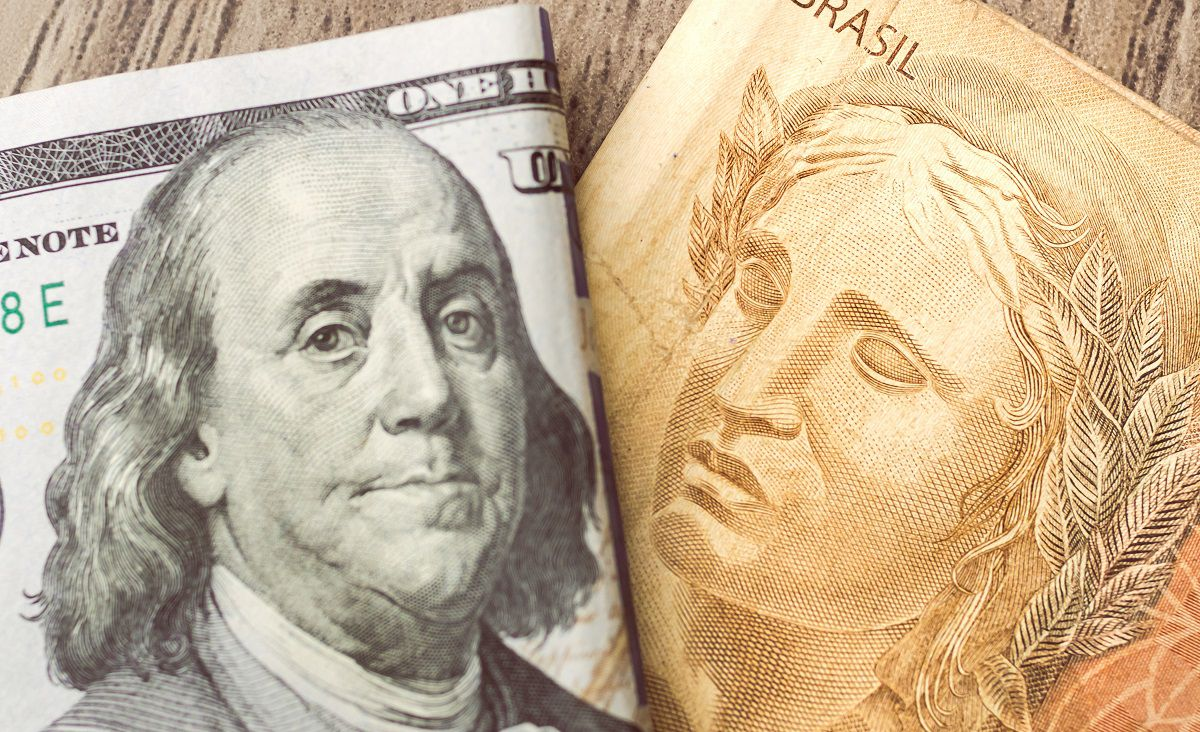

[Fonte](https://www.cepea.esalq.usp.br/br/indicador/boi-gordo.aspx)

In [ ]:
!pip install pmdarima

    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install pyramid-arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 515 kB 5.2 MB/s 
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ixlq4ltn/pyramid-arima_e8d4e853259843d580eae713df8a7368/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ixlq4ltn/pyramid-arima_e8d4e853259843d580eae713df8a7368/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-w4u1y0l9/install-record.txt --single-version-externa

In [ ]:
!pip install auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement auto_arima (from versions: none)
ERROR: No matching distribution found for auto_arima


In [ ]:
import pandas as pd
from datetime import datetime
from pmdarima.arima import auto_arima

In [ ]:

preco = pd.read_excel('dolar.xltx')

In [ ]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%Y')
#preco = pd.read_excel('dolar.xltx', parse_dates = ['data'], index_col = 'data', date_parser = dateparse)

In [ ]:
preco

In [ ]:
# Transformando a coluna data de 'Object' para 'DateTime'
preco['data'] = pd.to_datetime(preco['data'])
preco['cotacao'] = preco['cotacao'].str.replace(',','.')

preco['cotacao'] = preco['cotacao'].astype(float)


In [ ]:
preco.dtypes

data       datetime64[ns]
cotacao           float64
dtype: object

In [ ]:
print('A quantidade de colunas e linhas é:', preco.shape)
print('A quantidade de dados faltantes é:', preco.isna().sum().sum())
print('A quantidade de dados nulos é:', preco.isnull().sum().sum())

A quantidade de colunas e linhas é: (122, 2)
A quantidade de dados faltantes é: 0
A quantidade de dados nulos é: 0


In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pylab as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 5.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


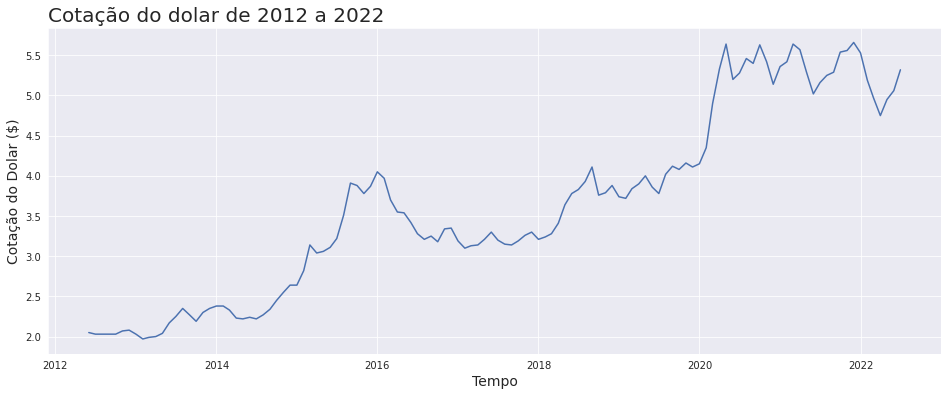

In [ ]:
sns.set_palette('deep')
sns.set_style('darkgrid')
ax = sns.lineplot(x='data', y='cotacao', data=preco)
ax.figure.set_size_inches(16,6)
ax.set_title('Cotação do dolar de 2012 a 2022', loc='left', fontsize=20)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Cotação do Dolar ($)', fontsize=14)
ax = ax

In [ ]:
# criando uma função para plotar automaticamente os graficos para economizar espaço e tempo. =)
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('deep')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=preco)
  ax.figure.set_size_inches(16,6)
  ax.set_title(titulo, loc='left', fontsize=20)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

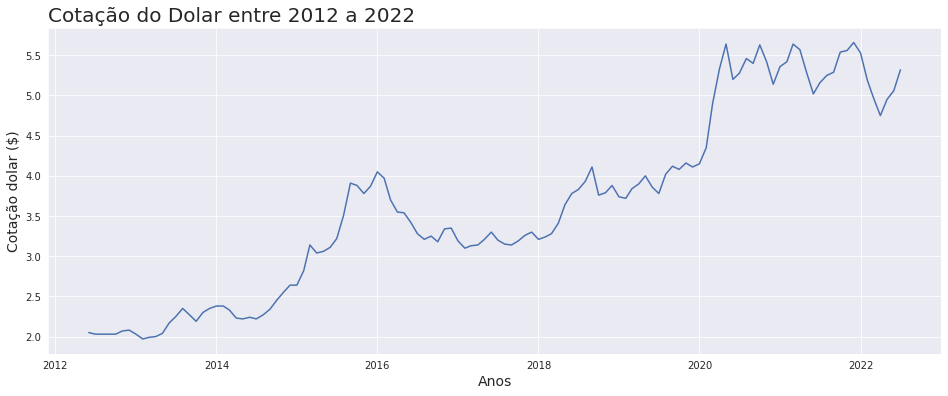

In [ ]:
plotar('Cotação do Dolar entre 2012 a 2022', 'Anos','Cotação dolar ($)','data','cotacao', preco)

In [ ]:
preco['aumento'] = preco['cotacao'].diff()
preco['velocidade'] = preco['aumento'].diff()
preco.head(4)

,data,cotacao,aumento,velocidade
0,2012-06-01,2.05,NaN,NaN
1,2012-07-01,2.03,-0.02,NaN
2,2012-08-01,2.03,0.00,0.02
3,2012-09-01,2.03,0.00,0.00


## **MELHORANDO A VISUALIZAÇÃO COM 3 GRAFICOS (COTAÇÃO, AUMENTO, VELOCIDADE)**

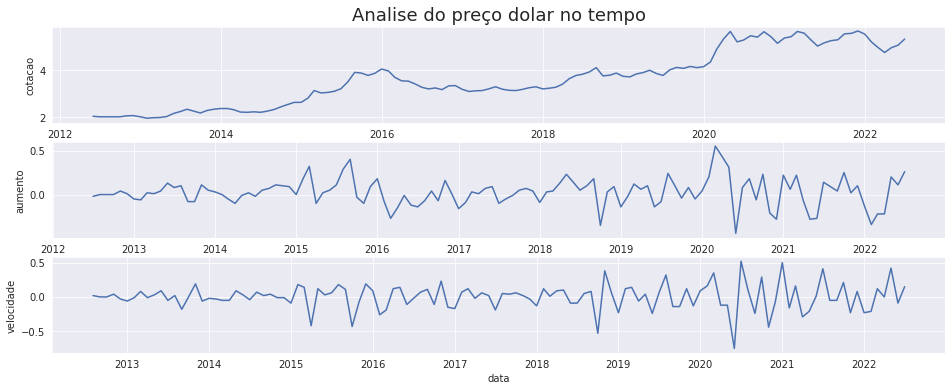

In [ ]:
plt.figure(figsize=(16,6))
ax = plt.subplot(3,1,1)
ax.set_title('Analise do preço dolar no tempo', fontsize=18)
sns.lineplot(x='data',y='cotacao', data=preco)
plt.plt.subplot(3,1,2)
sns.lineplot(x='data',y='aumento', data=preco)
plt.plt.subplot(3,1,3)
sns.lineplot(x='data',y='velocidade', data=preco)

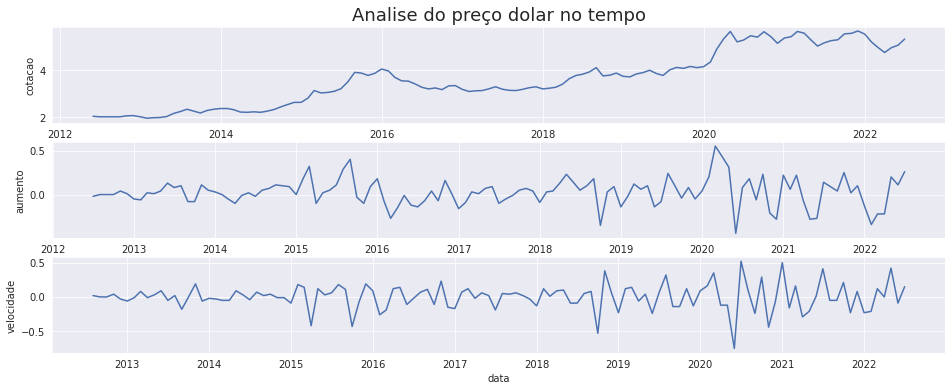

In [ ]:
# criando uma função para plotar automaticamente
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,6))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18)
  sns.lineplot(x=x,y=y1, data=dataset)
  plt.plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2, data=dataset)
  plt.plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3, data=dataset)
  ax = ax
plot_comparacao('data', 'cotacao', 'aumento', 'velocidade', preco, 'Analise do preço dolar no tempo')

# AUTOCORRELAÇÃO

In [ ]:
from pandas.plotting import autocorrelation_plot

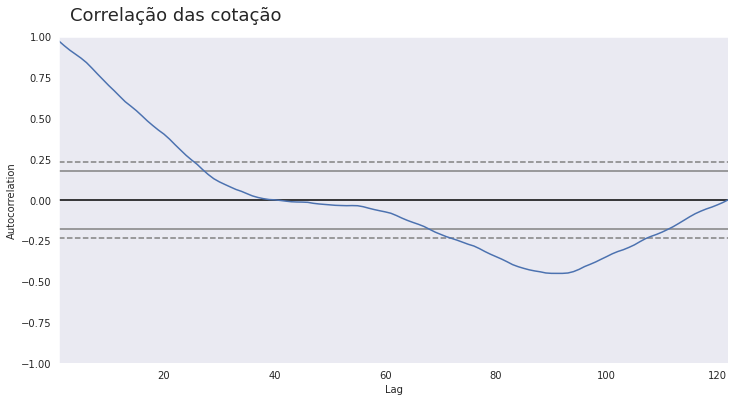

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das cotação', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(preco.cotacao)
ax = ax

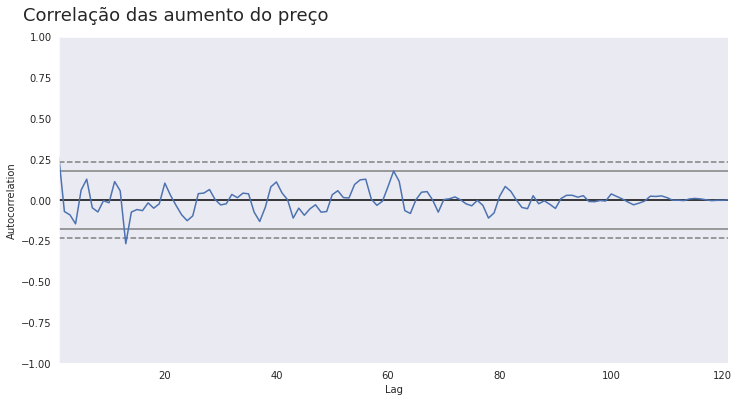

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento do preço', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(preco['aumento'][1:])
ax = ax

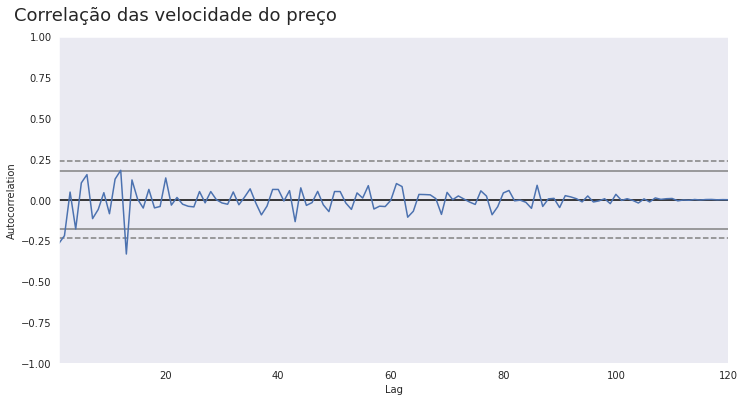

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das velocidade do preço', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(preco['velocidade'][2:])
ax = ax

# STATSMODEL

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose([preco['cotacao']],freq=3)
ax = resultado.plot()

TypeError: ignored

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido

})
resultado = pd.DataFrame(data)
resultado.head()

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia','sazonalidade', resultado, 'Exemplo de StatesModel')

# APLICANDO MEDIA MOVEL NA COTAÇÃO DO DOLAR

In [ ]:
preco['media_movel'] = preco['cotacao'].rolling(7).mean()
preco['media_movel_15'] = preco['cotacao'].rolling(15).mean()

In [ ]:
preco.head(5)

,data,cotacao,aumento,velocidade,media_movel,media_movel_15
0,2012-06-01,2.05,NaN,NaN,NaN,NaN
1,2012-07-01,2.03,-0.02,NaN,NaN,NaN
2,2012-08-01,2.03,0.00,0.02,NaN,NaN
3,2012-09-01,2.03,0.00,0.00,NaN,NaN
4,2012-10-01,2.03,0.00,0.00,NaN,NaN


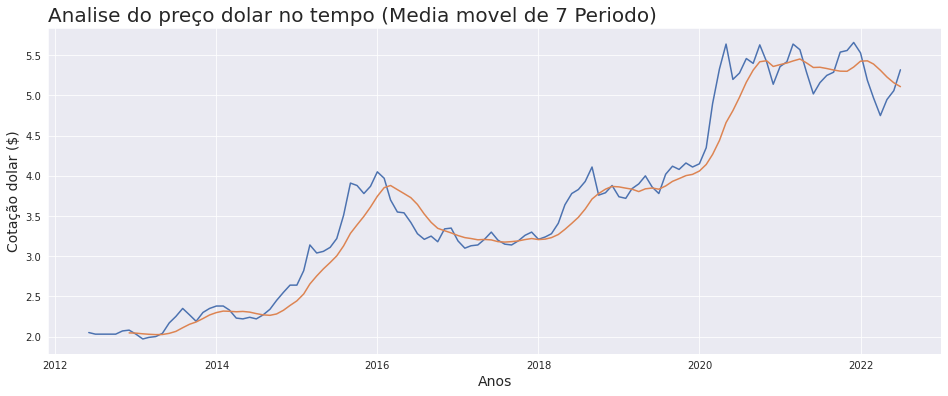

In [ ]:

plotar('Analise do preço dolar no tempo (Media movel de 7 Periodos)', 'Anos','Cotação dolar ($)','data','cotacao', preco)
plotar('Analise do preço dolar no tempo (Media movel de 7 Periodo)', 'Anos','Cotação dolar ($)','data','media_movel', preco)


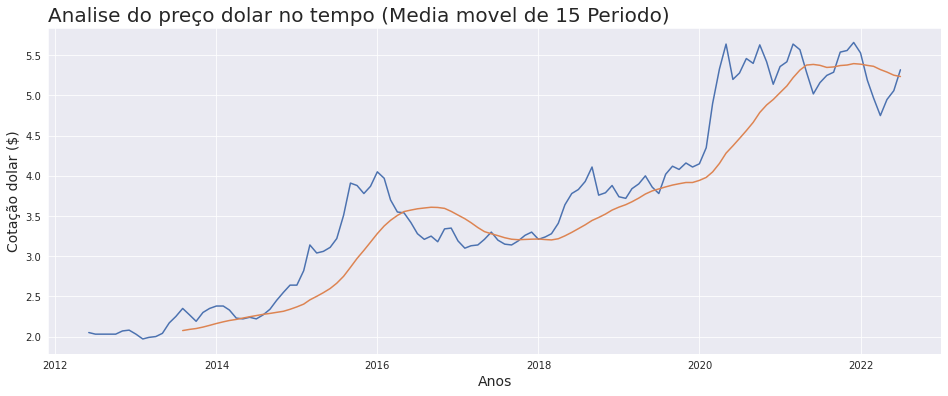

In [ ]:
plotar('Analise do preço dolar no tempo (Media movel de 15 Periodos)', 'Anos','Cotação dolar ($)','data','cotacao', preco)
plotar('Analise do preço dolar no tempo (Media movel de 15 Periodo)', 'Anos','Cotação dolar ($)','data','media_movel_15', preco)